# 5_1 Total Number of EVs by Make over Time in the UK

<Figure size 864x576 with 0 Axes>

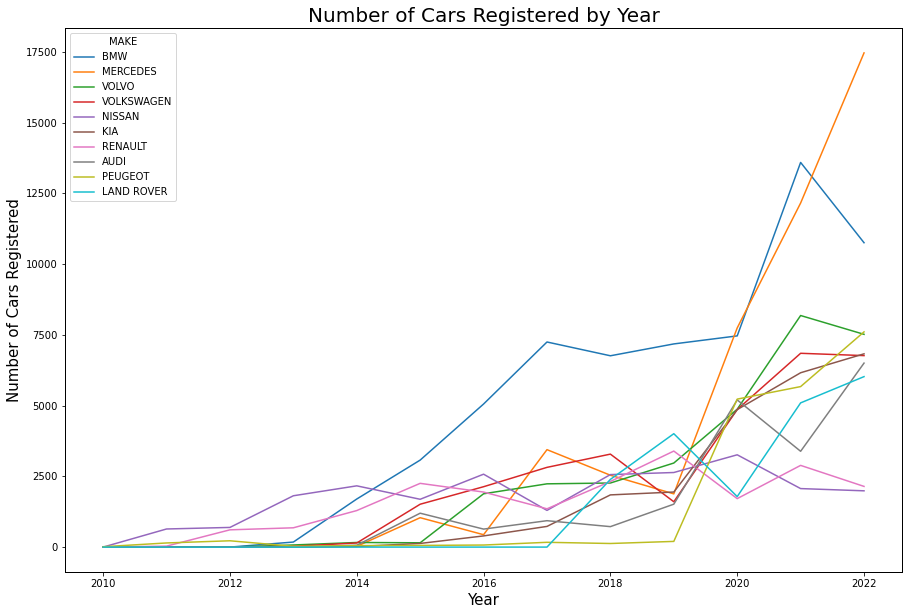

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'url_to_your_csv_file' with the raw GitHub URL of your CSV file
csv_url = r'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/5_1/VEH0171b_GenModels.csv?token=GHSAT0AAAAAACFKR6AD3JE6BQ3SPGZXAWWEZGI4SQQ'

# Read the CSV file into a DataFrame, skipping the first 4 rows
df = pd.read_csv(csv_url, skiprows=4)

# Save the first four columns in a separate DataFrame with the renamed names
first_four_columns = df.iloc[:, :6].rename(columns={df.columns[2]: 'BODY TYPE', df.columns[3]: 'MAKE', df.columns[4]: 'MODEL', df.columns[5]: 'FUEL'})

# Drop the first two columns from the original DataFrame
df.drop(df.columns[:4], axis=1, inplace=True)

# Create a new DataFrame to store the sums
sum_df = pd.DataFrame(index=df.index)

# Iterate through columns and group by left 4 characters of the header
for col in df.columns:
    header_prefix = col[:4]
    if header_prefix not in sum_df.columns:
        selected_columns = df.loc[:, df.columns.str[:4] == header_prefix]
        sum_df[header_prefix] = pd.to_numeric(selected_columns.stack(), errors='coerce').groupby(level=0).sum()

# Print the first few rows of the new DataFrame with sums and the first four columns unchanged
result_df = pd.concat([first_four_columns, sum_df], axis=1)
new_df = result_df.drop(result_df.columns[[0, 1,6, 7]], axis=1)

# Calculate the sum of numbers from the 5th column till the last column and add a new "TOTAL" column
new_df['TOTAL'] = new_df[new_df.columns[2:]].sum(axis=1)

# Filter out rows where 'MODEL' column contains the string "MISSING"
clean_data = new_df[~new_df['MODEL'].str.contains("MISSING")]

##############################################################################

bar_data = clean_data.drop(clean_data.columns[[0, 2, 3]], axis=1)
bar_data = bar_data.groupby('MAKE', as_index=False).sum()
bar_data = bar_data.sort_values(by='TOTAL', ascending=False)
bar_data = bar_data.head(10)
bar_data = bar_data.drop('TOTAL', axis=1)

# Set 'MAKE' column as the index before transposing
bar_data.set_index('MAKE', inplace=True)

# Transpose the DataFrame
bar_data_transposed = bar_data.transpose()
# print(bar_data_transposed)
##############################################################################
# Plotting stacked bar graph


# Create a figure
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

# Create a line chart for each brand
ax = bar_data_transposed.plot(kind='line', title='Number of Cars Registered by Year', figsize=(15, 10))

# Set labels and title with modified font size
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Cars Registered', fontsize=15)
ax.set_title('Number of Cars Registered by Year', fontsize=20)

# Set background color and remove grid
ax.set_facecolor('white')
ax.grid(False)
# Invert the x-axis
ax.invert_xaxis()

# Add box outline
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Show the plot
plt.show()